# Physical Oceanography

<img src="SST_Winds.png"/>

This tutorial is part of our Physical Oceanography day. It demonstrates how to do basic analysis and visualization of gridded oceanic and atmospheric data. We will use the so-called reanalysis data, a modeled estimate of how the ocean and atmosphere have evolved over the past several decades. This data has been downloaded using Copernicus API, a giant data database for Earth system observations and modeling. See the readme.txt and the download_era.py script for instructions on downloading the data -- it is very simple to do once you see an example. 

### Estimated tutorial time: 1.5 hours

## Tutorial goals
- Python Skills
    - Work with xarray package 
    - Make different plots
    - Calculate climatology and anomalies from it
    - Calculate global mean quantities from lat/lon data using area weights
    - Smooth noisy time series to identify long-term trends
- PO knowledge
    - Learn about the variability of ocean temperatures on seasonal and interannual timescale 
    - Identify if global warming trends can be seen in surface ocean temperature
    - See what El Nino and La Nina events look like and how the world responds to it
    
    
    


Start by importing everything you need: this sometimes require installation of packages that are not yet in your environment. To install a new package, create a new cell in the notebook, type __!pip install packagename__ and execute. Tip: use __Shift+Enter__ as a shortcut for executing a cell. 

In Jupyter notebooks, the exclamation mark ! executes commands from the underlying operating system. So you can use your standard linux commands, like __dir__ or __du -sh *__.

In [1]:
import numpy as np                 #for general calculations.
import matplotlib.pyplot as plt    #making plots.
import xarray as xr                #loading and working with data in an optimal way.

from matplotlib.animation import FuncAnimation  #creating animations and videos.
from IPython.display import Video, HTML         #embedding videos in the notebook

#this command allows interactive plots in noteboks
%matplotlib inline   

xarray opens the file and loads its format/variables but doesn't load the whole data untill it is actually necessary for some calculations or plotting.

In [2]:
#Specify the data file to load

ERA5="/dat1/gmanuch/ERA5/winds_sst_pres_prec.nc" # This is a 1/4 degree data
ERA5_Coarse='/dat1/gmanuch/DataScienceOceanography/ERA5_Coarse.nc'; # This is a 1 degree data, coarsend from 1/4 degree

era = xr.open_dataset(ERA5_Coarse); #xarray can open different format data, netcdf is one of them
era                                 #this simply prints what's in the dataset

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, time: 756)
Coordinates:
  * longitude  (longitude) float32 0.375 1.375 2.375 ... 357.375 358.375 359.375
  * latitude   (latitude) float32 89.625 88.625 87.625 ... -88.375 -89.375
  * time       (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2021-12-01
Data variables:
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    t2m_F      (time, latitude, longitude) float32 ...

### Creating a new variable

When presenting to a general audience it might be better to plot temperatures in Fahrenheit (or Celcius) instead of Kelvin.

Let's create a variable that is the temperature in Fahrenheit and add to our existing xarray variables. As you saw above, xarray variables have __attributes__ that specify useful information about the variables, like their longer description, units, sourse of data. It is a good practice to add attributes to all variables with some minimal information. 

In [3]:
era['t2m_F']=(era['t2m']-273.15)*1.8 + 32;             #Use the formula to get from C to F.

era['t2m_F'].attrs['long_name']='2m temperature';      #Add some attributes as name:value pairs.
era['t2m_F'].attrs['units']='Fahrenheit';
era['t2m_F'].attrs['formula']='(K-273.15) x 1.8 + 32';

era['t2m_F']                                           #see the new variable

<xarray.DataArray 't2m_F' (time: 756, latitude: 180, longitude: 360)>
array([[[-20.082611  , -20.076263  , -20.06992   , ..., -20.104828  ,
         -20.098484  , -20.09214   ],
        [-20.422195  , -20.390472  , -20.355564  , ..., -20.479324  ,
         -20.463451  , -20.447601  ],
        [-20.361908  , -20.31747   , -20.276215  , ..., -20.466637  ,
         -20.434887  , -20.399979  ],
        ...,
        [-16.712086  , -16.851723  , -16.988201  , ..., -16.38519   ,
         -16.489914  , -16.591484  ],
        [-17.956207  , -18.029182  , -18.105347  , ..., -17.756256  ,
         -17.819729  , -17.88636   ],
        [-18.562378  , -18.575066  , -18.584595  , ..., -18.524307  ,
         -18.536999  , -18.549686  ]],

       [[-26.325397  , -26.328556  , -26.328556  , ..., -26.322212  ,
         -26.322212  , -26.325397  ],
        [-26.236519  , -26.230175  , -26.220642  , ..., -26.22699   ,
         -26.230175  , -26.23336   ],
        [-25.598598  , -25.57322   , -25.550999  , ..., -25.792206  ,
         -25.72873   , -25.655727  ],
        ...,
        [-27.658371  , -27.737717  , -27.81388   , ..., -27.480637  ,
         -27.537766  , -27.59171   ],
        [-28.864395  , -28.908833  , -28.953247  , ..., -28.756481  ,
         -28.79139   , -28.826298  ],
        [-30.235458  , -30.22593   , -30.219585  , ..., -30.244965  ,
         -30.241806  , -30.238617  ]],

       [[-15.318802  , -15.312454  , -15.309269  , ..., -15.341019  ,
         -15.334675  , -15.328331  ],
        [-15.0744095 , -15.039501  , -15.007778  , ..., -15.156944  ,
         -15.131538  , -15.102974  ],
        [-15.997974  , -15.956722  , -15.915466  , ..., -16.105888  ,
         -16.07098   , -16.036072  ],
        ...,
        [-48.176712  , -48.211617  , -48.24334   , ..., -48.08149   ,
         -48.103706  , -48.13227   ],
        [-50.157135  , -50.17298   , -50.188858  , ..., -50.11904   ,
         -50.13173   , -50.144447  ],
        [-51.575798  , -51.550392  , -51.521828  , ..., -51.639275  ,
         -51.62024   , -51.598015  ]],

       ...,

       [[  9.404749  ,   9.401564  ,   9.398432  , ...,   9.398432  ,
           9.401564  ,   9.404749  ],
        [  9.84272   ,   9.833216  ,   9.820526  , ...,   9.845905  ,
           9.845905  ,   9.845905  ],
        [  9.534882  ,   9.490442  ,   9.442871  , ...,   9.582508  ,
           9.5698185 ,   9.5570755 ],
        ...,
        [-60.363922  , -60.386147  , -60.411522  , ..., -60.31949   ,
         -60.335358  , -60.341705  ],
        [-60.757454  , -60.798737  , -60.843147  , ..., -60.665443  ,
         -60.694008  , -60.722572  ],
        [-60.281418  , -60.256012  , -60.230637  , ..., -60.32583   ,
         -60.309982  , -60.297264  ]],

       [[ -2.4904785 ,  -2.5000076 ,  -2.50951   , ...,  -2.4714432 ,
          -2.477787  ,  -2.4841347 ],
        [ -1.1352882 ,  -1.1638527 ,  -1.1955757 , ...,  -1.0495949 ,
          -1.0781593 ,  -1.1067238 ],
        [ -0.41167068,  -0.47195816,  -0.54180527, ...,  -0.30376053,
          -0.33866882,  -0.37041855],
        ...,
        [-31.451015  , -31.508144  , -31.562088  , ..., -31.352604  ,
         -31.37801   , -31.406574  ],
        [-32.691948  , -32.714165  , -32.73639   , ..., -32.647507  ,
         -32.660194  , -32.67289   ],
        [-33.44094   , -33.428253  , -33.421906  , ..., -33.46      ,
         -33.45363   , -33.44729   ]],

       [[ -8.726921  ,  -8.7364235 ,  -8.745956  , ...,  -8.711048  ,
          -8.717392  ,  -8.720551  ],
        [ -7.098774  ,  -7.1273384 ,  -7.1590614 , ...,  -7.0098953 ,
          -7.03846   ,  -7.067024  ],
        [ -5.70549   ,  -5.772148  ,  -5.8483124 , ...,  -5.5848885 ,
          -5.6261406 ,  -5.661049  ],
        ...,
        [-13.071793  , -13.163834  , -13.255871  , ..., -12.859154  ,
         -12.925785  , -12.992447  ],
        [-13.531982  , -13.576397  , -13.624023  , ..., -13.417725  ,
         -13.452637  , -13.49073   ],
        [-14.058807  , -14.0683365 , -14.077866  

### Making a quick plot 
xarray includes plotting commands that use matplotlib in the background; this is useful to quickly view the data without having to specify the axis labels, colorbars, titles -- all of it is done for you!

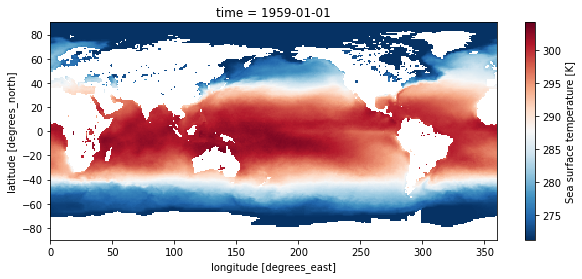

In [4]:
plt.figure(figsize=(10,4));                  #Specify figure size in inches
era.isel(time=0)['sst'].plot(cmap='RdBu_r'); #Plot using in-built xarray tools; isel() selects based on specified indices
plt.savefig('sst.png');                      #Save the figure as a png file

### Making a video

Create a plotting function that takes a single argument (frame number) and makes a corresponding figure. The video is then a sequence of frames that can be envoded (compressed) into a conventional mp4 video format, which can also be embedded into this notebook.

In [5]:
sst_video=era['sst'].sel(time=slice("2020", "2022"))-273.15; #in Celcius now

def animation_func(i):
    fig.clear()
    sst_video.isel(time=i).plot(cmap='RdBu_r',vmin=0, vmax=30);
    plt.axis('off')

fig = plt.figure(figsize=(10,4))
animation = FuncAnimation(fig, animation_func, 
                          frames = len(sst_video.time));

animation.save('sst.mp4'); 
plt.close();
Video('sst.mp4')

### Data nearest to a point
Sub-sampling the data nearest to the desired lat/lon location

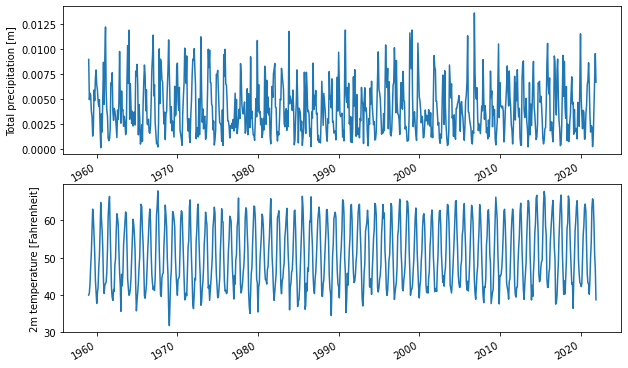

In [6]:
Lat_Seattle=47.6062;      #Define the coordinates or a point of interests
Lon_Seattle=360-122.3321;  

era_Seattle=era.sel(longitude=Lon_Seattle, 
                    latitude=Lat_Seattle, 
                    method="nearest");     #Get the data from a point nearest to the desired lat/lon location



plt.figure(figsize=(10, 6)); 
plt.subplot(2,1,1);              #plotting in several subplots
era_Seattle['tp'].plot();        #xarray figured out that you only have timeseries and made an appropriate plot
plt.xlabel(''); plt.title('');

plt.subplot(2,1,2)
era_Seattle['t2m_F'].plot();
plt.xlabel(''); plt.title('');


### Slicing the xarray

Learn how to select ranges of variables:
- The .sel()  selects variables by their ranges: era.sel(latitude > 30)
- The .isel() selects based on the index of variables: era.isel(latidude = 604)

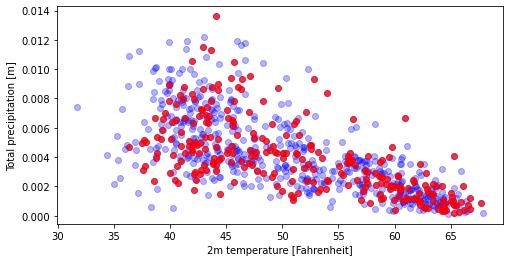

In [7]:
era_Seattle_recent=era_Seattle.sel(time=slice("2000-01", "2022-01")); # slice() creates a range of all values between the specified bounds

plt.figure(figsize=(8,4));
era_Seattle.plot.scatter('t2m_F','tp',color='blue',alpha=0.3); # scatter plot of surface temperature and precipitation in Seattle; 
era_Seattle_recent.plot.scatter('t2m_F','tp',color='red',alpha=0.7);  # highlight points from a chosen time range 
#the parameter alpha has a range [0,1] and makes points transparent


As you can see from the plot above, higher precipiration is generally correlated with lower temperatures. Note, we are dealing with monthly-mean data and the temperature variability is dominated by seasonal cycles. This implies that precipitation in Seattle is higher in winter than in summer. 

I bet it isn't raining right now as you going over the tutorial with us: am I wrong?

### Calculating weighed means

Each pixel of the data represents an area of different size. Hence the global mean value can be significantly different from a pixel average. Make sure you do weighed averages! Below is an example of calculating a global mean temperature and its long-term trends

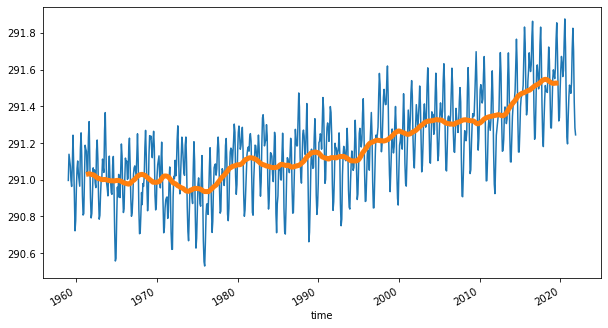

In [8]:
sst=era['sst'];

weights = np.cos(np.deg2rad(era.latitude)); weights.name = "weights"; # area of the cell scales as dlat*dlon*cos(lat) and we can use it to compute weighted averages; note, dlat=dlon for this dataset.

SST_global_mean = sst.weighted(weights).mean(dim=['latitude','longitude']); # this IS area-weighted mean

#The mean SST has long-term positive trend -- aka Global Warming! Let's calculate a running mean to more clearly see this trend

SST_global_mean_runningMean=SST_global_mean.rolling(time=12*5,center=True).mean() # global mean smoothed over many months

plt.figure(figsize=(10,5))
SST_global_mean.plot(label="SST" );
SST_global_mean_runningMean.plot(label="SST rolling mean", linewidth=5 );

### Calculating climatology and anomalies
Since there is a very strong repeating seasonal cycle on Earth, it is often convenient to focus on deviations from this seasonal cycle, which are called anomalies.  

Montly climatology is reffering to variables that are averaged after being grouped by months. Anomalies are deviations from the climatology. 

Let's see what temperature anomalies look like in the ocean and if they are giving a qualitatively different picture of the ocean variability.

In [9]:
sst=era['sst'];
sst_clim=sst.groupby("time.month").mean('time'); # creating monthly mean climatology for sst
sst_a = sst.groupby("time.month")-sst_clim;      # xarray figures out broadcasting of arrays to take the difference between sst(t) and sst(month)

/home/gmanuch/.local/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [10]:
sst_video=sst_a.sel(time=slice("1997", "1998")); #This is the strongest El Nino on record. 

def animation_func(i):
    fig.clear()
    sst_video.isel(time=i).plot(cmap='RdBu_r',vmin=-3, vmax=3);
    plt.plot( [190,240, 240,190,190], [-5, -5, 5, 5,-5],'k--')
    plt.axis('off')

fig = plt.figure(figsize=(10,4))
animation = FuncAnimation(fig, animation_func, 
                          frames = len(sst_video.time));

animation.save('sst_anomaly.mp4'); 
plt.close();
Video('sst_anomaly.mp4')

### El Niño -- Southern Oscillation (ENSO)

El Niño is the warm phase of the El Niño–Southern Oscillation and is associated with a band of warm ocean water that develops in the central and east-central equatorial Pacific, including the area off the Pacific coast of South America. https://en.wikipedia.org/wiki/El_Ni%C3%B1o


NOAA considers El Niño conditions to be present in the ocean when the Oceanic Nino Index (ONI) in that area, known as the Niño-3.4 region, is +0.5 or higher, meaning surface waters in the east-central tropical Pacific are 0.5 degrees Celsius (0.9 degrees Fahrenheit) or more warmer than average. https://www.climate.gov/news-features/understanding-climate/climate-variability-oceanic-ni%C3%B1o-index

/home/gmanuch/.local/lib/python3.7/site-packages/xarray/core/alignment.py:304: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  index = joiner(matching_indexes)


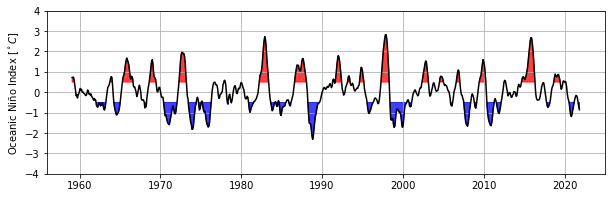

In [11]:
NINO34 = sst_a.sel(latitude=slice(5,-5), 
                  longitude=slice(190,240)).weighted(weights).mean(dim=['latitude','longitude'])

ONI= NINO34.rolling(time=3,center=True).mean(); #rolling mean over 3 months

plt.figure(figsize=(10,3))
ax=plt.gca()
plt.plot(ONI.time, ONI,'k')
ax.fill_between(ONI.time.data, 0.5, ONI, ONI> 0.5, color='red', alpha=.75)
ax.fill_between(ONI.time.data, -0.5, ONI, ONI< -0.5, color='blue',  alpha=.75)
plt.ylim((-4,4));
plt.grid(visible=True)
plt.ylabel('Oceanic Niño Index [$^\circ C$]');

### Global mean temperature and ENSO

To have a clearer view of how the global mean ocean temperature varies on interannual timescales, let's remove the long-term trends and explore its relation to ONI.


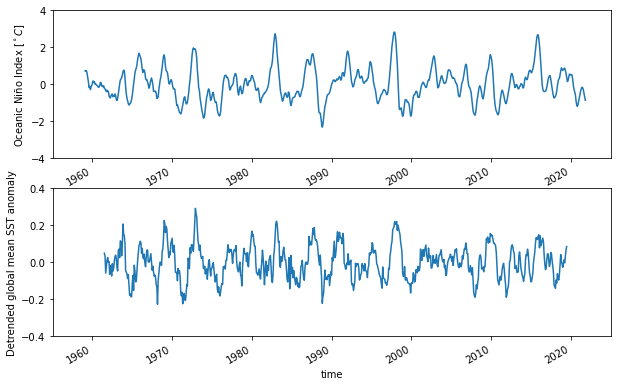

In [12]:
SSTa_global_mean = sst_a.weighted(weights).mean(dim=['latitude','longitude']); # this IS area-weighted mean
SSTa_global_mean_runningMean=SSTa_global_mean.rolling(time=12*5,center=True).mean() # global anomaly mean smoothed over many months

SSTa_global_mean_Detrended=(SSTa_global_mean-SSTa_global_mean_runningMean);

plt.figure(figsize=(10,6))

ax=plt.subplot(2,1,1)
ONI.plot(ax=ax, xlim=('1955','2025'))
plt.ylabel('Oceanic Niño Index [$^\circ C$]');plt.ylim((-4,4));

ax=plt.subplot(2,1,2)
SSTa_global_mean_Detrended.plot(ax=ax, xlim=('1955','2025'));
plt.ylabel("Detrended global mean SST anomaly")
plt.ylim((-0.4,0.4));


In [13]:
#Now we can clearly see the strong correlation between the Global Ocean Temperature and ENSO defined using NINO3 index
x=ONI.data; y=SSTa_global_mean_Detrended.data;
x=x[~np.isnan(y)];  y=y[~np.isnan(y)]; # remove nan that polyfit can't deal with

correlation = np.corrcoef(x, y)[0,1] #calculate a correlation coefficient between ONI and global mean temperature anomaly 

correlation

0.6243329927349602

### Exercise

Choose a strong El Nino event and plot the ocean temperature anomaly during it. Add the Nino34 box and a point for Seattle's location for reference.


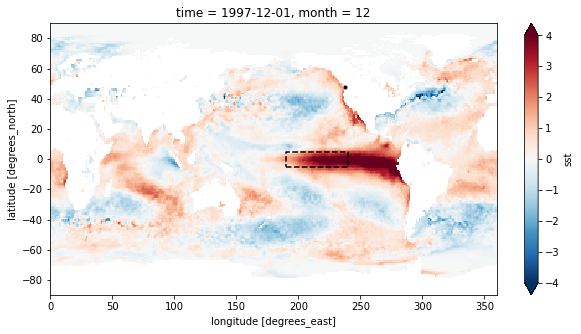

In [14]:
sst_a.sel(time='1997-12').plot(figsize=(10,5),cmap='RdBu_r', vmin=-4, vmax=4);
plt.plot([190,240, 240,190,190], [-5, -5, 5, 5,-5],'k--');
plt.plot(Lon_Seattle,Lat_Seattle,      # add a dot for Seattle!
         marker='.',color='k'); 

/home/gmanuch/.local/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


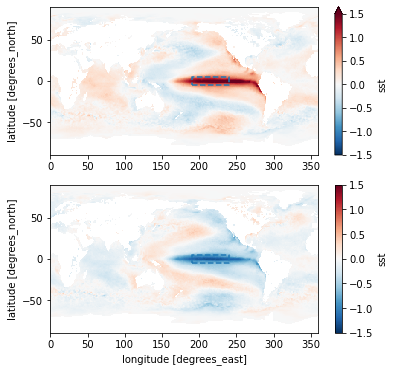

In [15]:
#learn how to compute conditional averages; 
#for example El Nino evens are defined as NINO3>0.5, while La Nina as NINO3<-0.5. 
#See what the world's temperature anomaly looks like conditioned onto El Nino or La Nina

plt.figure(figsize=(6,6))

ax=plt.subplot(2,1,1)
sst_a[ONI>0.5,:,:].mean('time').plot(ax=ax,cmap='RdBu_r', vmin=-1.5, vmax=1.5);
plt.plot( [190,240, 240,190,190], [-5, -5, 5, 5,-5],'--');
plt.xlabel('');

ax=plt.subplot(2,1,2)
sst_a[ONI<-0.5,:,:].mean('time').plot(ax=ax,cmap='RdBu_r',vmin=-1.5, vmax=1.5);
plt.plot( [190,240, 240,190,190], [-5, -5, 5, 5,-5],'--');


# Homework
Figure out what happens in Seattle during ENSO events. Is it raining more or less? Is it hotter or colder? El Nino is defined as the ONI index being higher than 0.5 and La Nina lower than -0.5. 

## Solution

In [16]:
era_Seattle_clim=era_Seattle.groupby("time.month").mean('time');    # creating monthly mean climatology for seattle location
era_Seattle_a =  era_Seattle.groupby("time.month")-era_Seattle_clim; # calculating anomalies

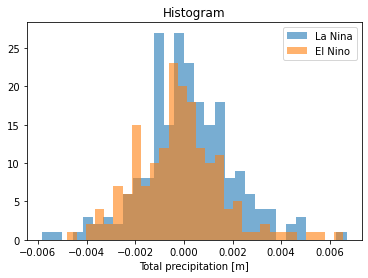

In [17]:
era_Seattle_a['tp'][ONI<-0.5].plot.hist(bins=30,alpha=0.6)
era_Seattle_a['tp'][ONI>0.5].plot.hist(bins=30,alpha=0.6)
plt.legend(('La Nina','El Nino'));
plt.xlabel('Total precipitation [m]');
# looks like it precipitates a bit more during La Nina events, but not dramatically more.

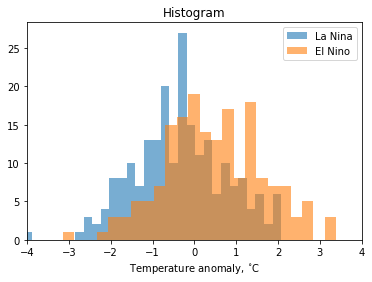

In [18]:
era_Seattle_a['t2m'][ONI<-0.5].plot.hist(bins=30,alpha=0.6)
era_Seattle_a['t2m'][ONI>0.5].plot.hist(bins=30,alpha=0.6)
plt.legend(('La Nina','El Nino'));
plt.xlabel('Temperature anomaly, $^{\circ}$C');
plt.xlim((-4,4));
# How much hotter it is during strong El Nino and La Nina in Seattle?